In [3]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [4]:
# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [5]:
# настроим удобное отображение графиков и таблиц
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_rows = 20

In [6]:
# загрузим данные
s = pd.read_csv(
    './FEDFUNDS.csv', 
    header=0, 
    index_col=0, 
    parse_dates=True, 
    squeeze=True)

# оставим данные только до 2008 года
s = s[:'2007']

Разбиваем набор данных на обучающую и тестовую выборки так, чтобы в тестовой выборке оказалось 7 наблюдений.

In [7]:
# разобьем данные на обучающую и тестовую выборки так,
# чтобы в тесте оказалось 7 наблюдений
X = s.values
train, test = X[0:len(X)-7], X[len(X)-7:]

Построение MA(1) (ARIMA(0,0,1) обучаем модель скользящего среднего на обучающей выборке)

In [8]:
# обучим MA(1)-модель
model = ARIMA(train, order=(0, 0, 1))
model_fit = model.fit()

In [10]:
# выведем константу и коэффициенты модели с помощью атрибута .params
coef = model_fit.params
print('Константа и коэффициенты:\n\n%s' % coef)

Константа и коэффициенты:

[5.69496955 0.93539622 3.20231277]


In [11]:
# взглянем, как был получен первый прогноз
forecast_frst = coef[0] + (model_fit.resid[-1:] * coef[1])[0]
forecast_frst

5.517907571950164

In [12]:
# делаем прогнозы на 7 временных шагов вперед
# для этого в методе .predict() задаем начало и конец 
# периода прогнозирования
predictions = model_fit.predict(
    start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [13]:
# напечатаем прогнозы на 7 временных шагов вперед
for i in range(len(predictions)):
    print('спрогнозированное=%f, фактическое=%f' % (predictions[i], test[i]))
# вычислим значение метрики RMSE
rmse = np.sqrt(
    mean_squared_error(test, predictions))

print('\nRMSE на тестовой выборке: %.3f' % rmse)

спрогнозированное=5.517908, фактическое=5.250000
спрогнозированное=5.694970, фактическое=5.260000
спрогнозированное=5.694970, фактическое=5.020000
спрогнозированное=5.694970, фактическое=4.940000
спрогнозированное=5.694970, фактическое=4.760000
спрогнозированное=5.694970, фактическое=4.490000
спрогнозированное=5.694970, фактическое=4.240000

RMSE на тестовой выборке: 0.905


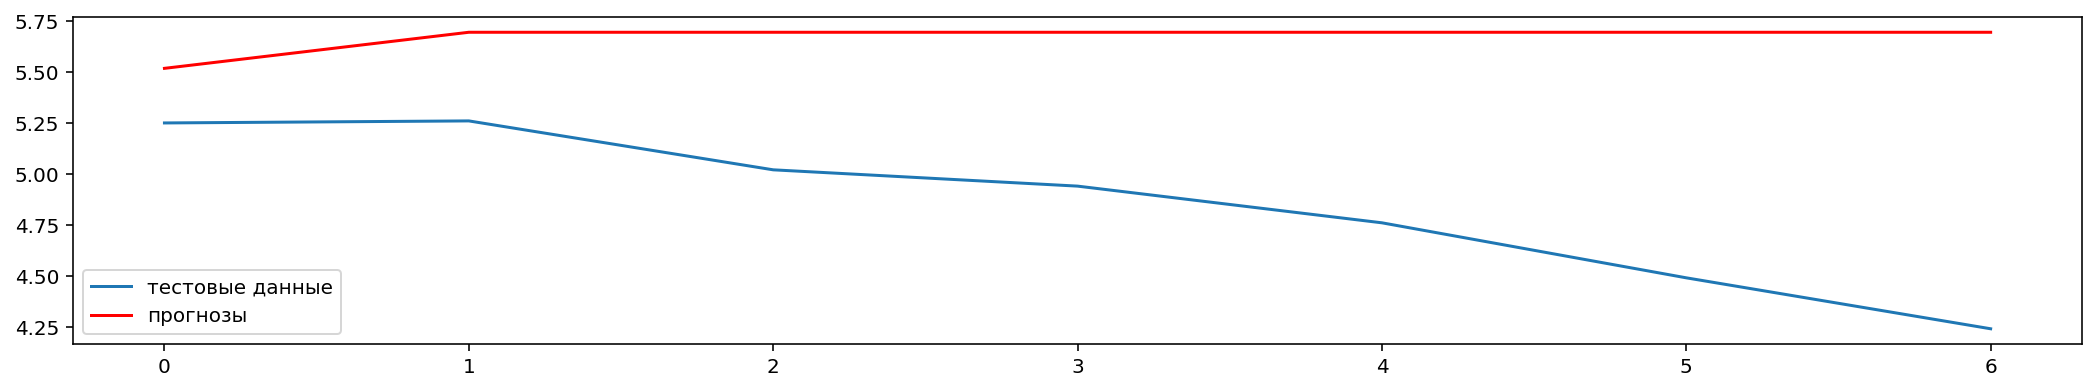

In [14]:
# визуализируем прогнозы
plt.plot(test, label='тестовые данные')
plt.plot(predictions, color='red', label='прогнозы')
plt.legend();

Вывод по MA(1) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.905)

Задаение 4. Построение MA(2) (ARIMA(0,0,2) обучаем модель скользящего среднего на обучающей выборке)

спрогнозированное=5.416770, фактическое=5.250000
спрогнозированное=5.563435, фактическое=5.260000
спрогнозированное=5.690637, фактическое=5.020000
спрогнозированное=5.690637, фактическое=4.940000
спрогнозированное=5.690637, фактическое=4.760000
спрогнозированное=5.690637, фактическое=4.490000
спрогнозированное=5.690637, фактическое=4.240000

RMSE на тестовой выборке: 0.890


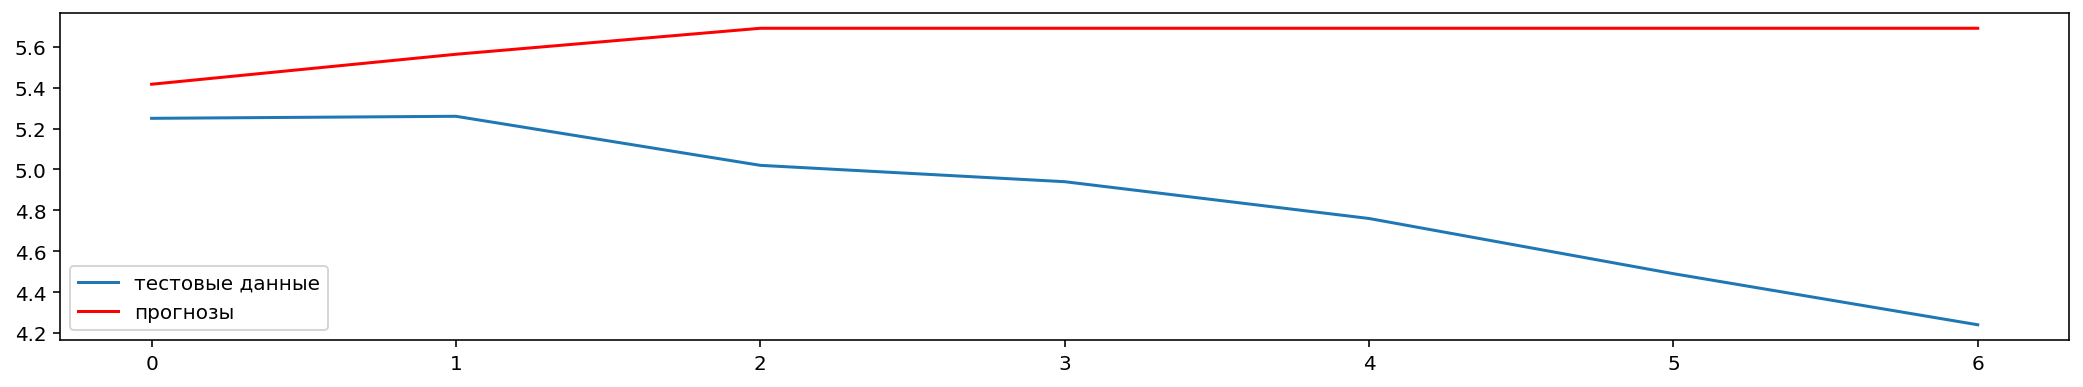

In [15]:
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
coef = model_fit.params
forecast_frst = coef[0] + (model_fit.resid[-1:] * coef[1])[0]
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('спрогнозированное=%f, фактическое=%f' % (predictions[i], test[i]))
# вычислим значение метрики RMSE
rmse = np.sqrt(
    mean_squared_error(test, predictions))
print('\nRMSE на тестовой выборке: %.3f' % rmse)

plt.plot(test, label='тестовые данные')
plt.plot(predictions, color='red', label='прогнозы')
plt.legend();

Вывод по MA(2) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.890)

Задание 5. Построение MA(4) (ARIMA(0,0,4) обучаем модель скользящего среднего на обучающей выборке)

спрогнозированное=5.303981, фактическое=5.250000
спрогнозированное=5.430538, фактическое=5.260000
спрогнозированное=5.590808, фактическое=5.020000
спрогнозированное=5.656044, фактическое=4.940000
спрогнозированное=5.680474, фактическое=4.760000
спрогнозированное=5.680474, фактическое=4.490000
спрогнозированное=5.680474, фактическое=4.240000

RMSE на тестовой выборке: 0.863


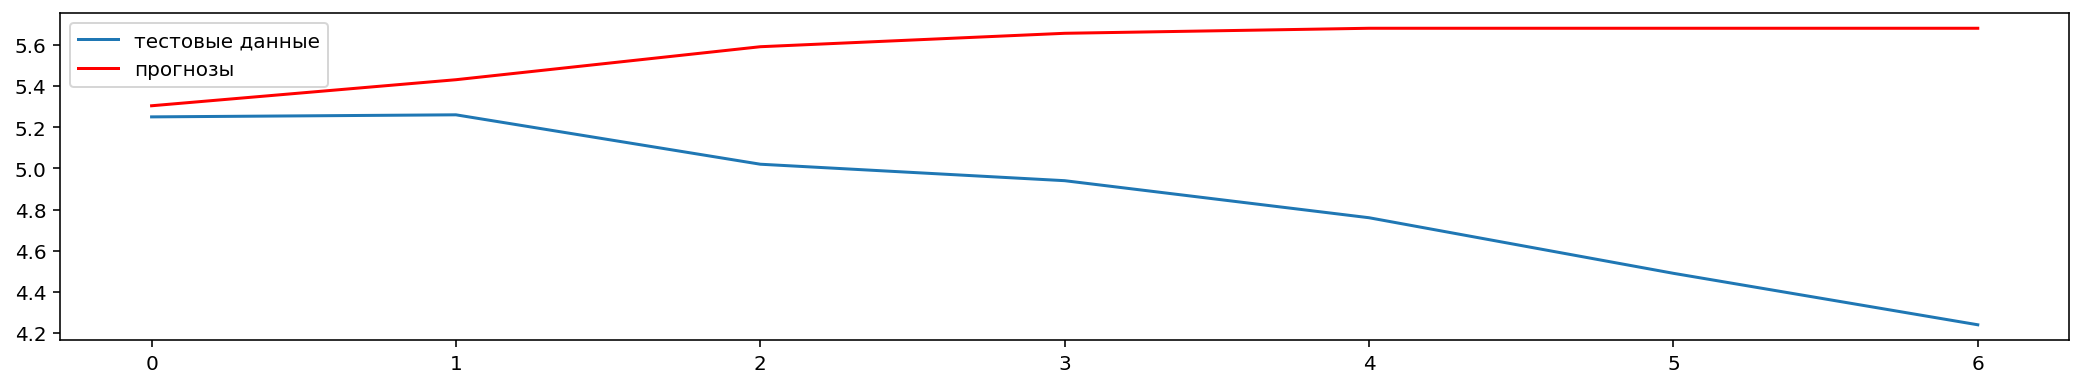

In [16]:
model = ARIMA(train, order=(0, 0, 4))
model_fit = model.fit()
coef = model_fit.params
forecast_frst = coef[0] + (model_fit.resid[-1:] * coef[1])[0]
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('спрогнозированное=%f, фактическое=%f' % (predictions[i], test[i]))
# вычислим значение метрики RMSE
rmse = np.sqrt(
    mean_squared_error(test, predictions))
print('\nRMSE на тестовой выборке: %.3f' % rmse)

plt.plot(test, label='тестовые данные')
plt.plot(predictions, color='red', label='прогнозы')
plt.legend();

Вывод по MA(4) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.863)

Задание 6. Построение MA(40) (ARIMA(0,0,40) обучаем модель скользящего среднего на обучающей выборке)

спрогнозированное=5.120577, фактическое=5.250000
спрогнозированное=5.280703, фактическое=5.260000
спрогнозированное=5.298336, фактическое=5.020000
спрогнозированное=5.185621, фактическое=4.940000
спрогнозированное=5.319140, фактическое=4.760000
спрогнозированное=5.413956, фактическое=4.490000
спрогнозированное=5.332698, фактическое=4.240000

RMSE на тестовой выборке: 0.599


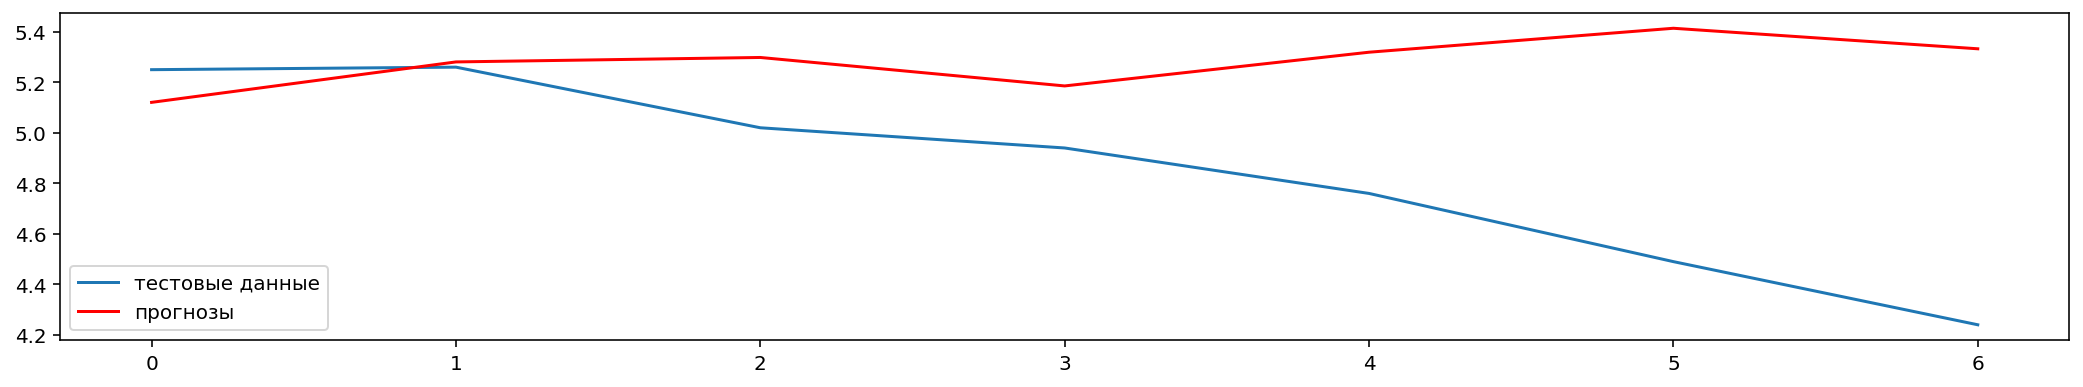

In [17]:
model = ARIMA(train, order=(0, 0, 40))
model_fit = model.fit()
coef = model_fit.params
forecast_frst = coef[0] + (model_fit.resid[-1:] * coef[1])[0]
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('спрогнозированное=%f, фактическое=%f' % (predictions[i], test[i]))
# вычислим значение метрики RMSE
rmse = np.sqrt(
    mean_squared_error(test, predictions))
print('\nRMSE на тестовой выборке: %.3f' % rmse)

plt.plot(test, label='тестовые данные')
plt.plot(predictions, color='red', label='прогнозы')
plt.legend();

Вывод по MA(40) модель прогноза уже мало отклоняется (RMSE на тестовой выборке: 0.599)

Задание 7. Построение MA(100) (ARIMA(0,0,100) обучаем модель скользящего среднего на обучающей выборке)

спрогнозированное=5.281264, фактическое=5.250000
спрогнозированное=5.396483, фактическое=5.260000
спрогнозированное=5.630356, фактическое=5.020000
спрогнозированное=5.964349, фактическое=4.940000
спрогнозированное=6.351534, фактическое=4.760000
спрогнозированное=6.694725, фактическое=4.490000
спрогнозированное=6.893538, фактическое=4.240000

RMSE на тестовой выборке: 1.506


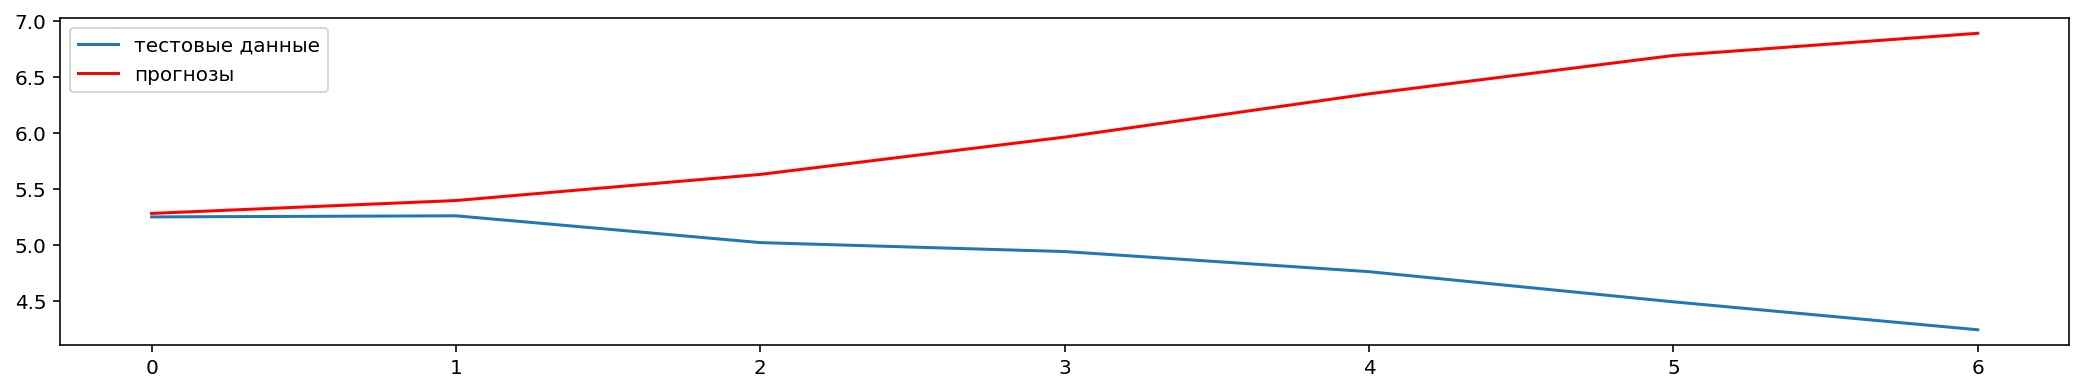

In [19]:
model = ARIMA(train, order=(0, 0, 100))
model_fit = model.fit()
coef = model_fit.params
forecast_frst = coef[0] + (model_fit.resid[-1:] * coef[1])[0]
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):
    print('спрогнозированное=%f, фактическое=%f' % (predictions[i], test[i]))
# вычислим значение метрики RMSE
rmse = np.sqrt(
    mean_squared_error(test, predictions))
print('\nRMSE на тестовой выборке: %.3f' % rmse)

plt.plot(test, label='тестовые данные')
plt.plot(predictions, color='red', label='прогнозы')
plt.legend();

Вывод по MA(100) модель прогноза уже сильно отклоняется (RMSE на тестовой выборке: 1.506)

Выводы по моделям: модель MA(40) дает наилучший результат, НО чем дальше, тем больше каждая из моделей ошибается. Модель MA(100) перестает давать хороший результат.  
    
    Вывод по MA(1) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.905) плохое предсказание 
    
    Вывод по MA(2) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.890) плохое предсказание 
    
    Вывод по MA(4) модель прогноза сильно отклоняется (RMSE на тестовой выборке: 0.863) плохое предсказание 
    
    Вывод по MA(40) модель прогноза уже мало отклоняется (RMSE на тестовой выборке: 0.599) хорошее предсказане  
    
    Вывод по MA(100) модель прогноза уже сильно отклоняется (RMSE на тестовой выборке: 1.506) плохое предсказание 